# ✨ 다중 선형 회귀 ✨
y = a1x1 + a2x2+ b    
=> 이제부터 경사하강법으로 기울기(a1, a2)를 구하자!

In [2]:
import tensorflow as tf

In [3]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]    # 새로 추가되는 값
y_data = [y_row[2] for y_row in data]

# 기울기 a와 y절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0 ~ 10 사이이며, y절편은 0 ~ 100 사이에서 변하게 한다.
# 정수 전체의 범위를 주면 시간이 너무 오래 걸림.
# 더 복잡한 분석을 할 때, 기울기가 수렴을 안하면 범위를 바꿔줘야 한다.
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))    # 새로 추가되는 값
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

# y에 대한 일차 방정식 a1x1 + a2x2 + b의 식을 세운다.
y = a1 * x1 + a2 * x2 + b

In [5]:
# 텐서플로우 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data)))

# 학습률 값  => 얼만큼 이동시킬지를 정해준다. (너무 크게 잡으면 수렴하지 않고 발산 / 너무 작게 잡으면 오래걸림)
# 기울기 부호 양수면 왼쪽, 음수면 오른쪽으로 이동
learning_rate = 0.1  

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)  # a, b를 계속 조정하면서 그래프를 생성

# 텐서플로우를 이용한 학습
with tf.Session() as sess:
    
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    
    # 2001번 실행 (0번째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent)
        
        # 100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch : %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y절편 b = %.4f" %
                 (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))   😊🍕🍔🍜🍣🦪🍻🍅💕

Epoch : 0, RMSE = 49.1842, 기울기 a1 = 7.5270, 기울기 a2 = 7.8160, y절편 b = 80.5980
Epoch : 100, RMSE = 1.8368, 기울기 a1 = 1.1306, 기울기 a2 = 2.1316, y절편 b = 78.5119
Epoch : 200, RMSE = 1.8370, 기울기 a1 = 1.1879, 기울기 a2 = 2.1487, y절편 b = 78.1057
Epoch : 300, RMSE = 1.8370, 기울기 a1 = 1.2122, 기울기 a2 = 2.1571, y절편 b = 77.9352
Epoch : 400, RMSE = 1.8370, 기울기 a1 = 1.2226, 기울기 a2 = 2.1607, y절편 b = 77.8636
Epoch : 500, RMSE = 1.8370, 기울기 a1 = 1.2269, 기울기 a2 = 2.1622, y절편 b = 77.8335
Epoch : 600, RMSE = 1.8370, 기울기 a1 = 1.2288, 기울기 a2 = 2.1628, y절편 b = 77.8208
Epoch : 700, RMSE = 1.8370, 기울기 a1 = 1.2295, 기울기 a2 = 2.1631, y절편 b = 77.8155
Epoch : 800, RMSE = 1.8370, 기울기 a1 = 1.2299, 기울기 a2 = 2.1632, y절편 b = 77.8133
Epoch : 900, RMSE = 1.8370, 기울기 a1 = 1.2300, 기울기 a2 = 2.1632, y절편 b = 77.8124
Epoch : 1000, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8120
Epoch : 1100, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8118
Epoch : 1200, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, 

In [7]:
# 실제 y값은 93

# epoch 0일 때
y1 = 7.5270 * 4 + 7.8160 * 4 + 80.5980
print(y1)

# epoch 500일 때
y2 = 1.2269 * 4 + 2.1622 * 4 + 77.8335
print(y2)

# epoch 2000일 때
y3 = 1.2301 * 4 + 2.1633 * 4 + 77.8117
print(y3)

141.97
91.3899
91.3853


In [8]:
# 실제 y값은 91

# epoch 0일 때
y1 = 7.5270 * 6 + 7.8160 * 2 + 80.5980
print(y1)

# epoch 500일 때
y2 = 1.2269 * 6 + 2.1622 * 2 + 77.8335
print(y2)

# epoch 2000일 때
y3 = 1.2301 * 6 + 2.1633 * 2 + 77.8117
print(y3)

141.392
89.5193
89.5189


# ✨ 혈중 지방 함량 예측 ✨

In [11]:
import numpy as np

In [26]:
Data_set = np.loadtxt("Blood_fat.csv", delimiter = ",")

In [42]:
print(y_data)

[354.0, 190.0, 405.0, 263.0, 451.0, 302.0, 288.0, 385.0, 402.0, 365.0, 209.0, 290.0, 346.0, 254.0, 395.0, 434.0, 220.0, 374.0, 308.0, 220.0, 311.0, 181.0, 274.0, 303.0, 244.0]


In [54]:
#x1 = Data_set[:, 0]
#x2 = Data_set[:, 1]
#y_data = Data_set[:, 2]

x1 = [x_row1[0] for x_row1 in Data_set]
x2 = [x_row2[1] for x_row2 in Data_set]
y_data = [y_row[2] for y_row in Data_set]


# 기울기 a와 y절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0 ~ 10 사이이며, y절편은 0 ~ 100 사이에서 변하게 한다.
# 정수 전체의 범위를 주면 시간이 너무 오래 걸림.
# 더 복잡한 분석을 할 때, 기울기가 수렴을 안하면 범위를 바꿔줘야 한다.
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))  # 균등분포로부터 난수값을 봔환 (동일한 확률로)
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

# y에 대한 일차 방정식 a1x1 + a2x2 + b의 식을 세운다.
y = a1 * x1 + a2 * x2 + b

In [56]:
# 텐서플로우 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data)))

# 학습률 값  => 얼만큼 이동시킬지를 정해준다. (너무 크게 잡으면 수렴하지 않고 발산 / 너무 작게 잡으면 오래걸림)
# 기울기 부호 양수면 왼쪽, 음수면 오른쪽으로 이동
learning_rate = 0.001

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)  # a, b를 계속 조정하면서 그래프를 생성

# 텐서플로우를 이용한 학습
with tf.Session() as sess:
    
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    
    # 2001번 실행 (0번째를 포함하므로)
    for step in range(1200001):
        sess.run(gradient_decent)
        
        # 100번마다 결과 출력
        if step % 40000 == 0:
            print("Epoch : %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y절편 b = %.4f" %
                 (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))   #😊🍕🍔🍜🍣🦪🍻🍅💕
            print(sess.run(y))

Epoch : 0, RMSE = 643.9146, 기울기 a1 = 7.9995, 기울기 a2 = 8.0295, y절편 b = 80.6891
[1121.99907008  825.23881896 1018.1862386   881.53515981 1146.32760378
  833.38835043  809.48002922  945.71089552 1170.32597052 1033.94502833
  489.38174527 1041.5542866  1018.1862386   721.33594194 1034.42527118
 1018.06617788  833.65848703 1122.14914597 1082.12185289 1009.64650981
  922.01268056  801.33049775 1057.73328883  841.83803368  825.53897074]
Epoch : 40000, RMSE = 41.3815, 기울기 a1 = 0.3885, 기울기 a2 = 5.2043, y절편 b = 80.5186
[352.54895236 212.96406527 376.39339186 263.84148528 406.6882156
 237.43155253 250.71348412 295.84419586 407.8536829  338.643973
 215.91072163 276.4270669  376.39339186 222.36110587 415.6967671
 357.13019333 280.77374921 376.62795051 369.86970539 289.32050939
 342.83672488 226.24599687 306.09884288 310.0570361  261.12206158]
Epoch : 80000, RMSE = 41.3814, 기울기 a1 = 0.3893, 기울기 a2 = 5.2046, y절편 b = 80.4501
[352.56123899 212.95914508 376.39286294 263.83754767 406.69792006
 237.425175

Epoch : 800000, RMSE = 41.3801, 기울기 a1 = 0.4002, 기울기 a2 = 5.2093, y절편 b = 79.4904
[352.73349786 212.89016381 376.38544747 263.78234235 406.83397679
 237.33576507 250.56242309 295.83839125 408.0345624  338.71318819
 215.31829007 276.59532765 376.38544747 222.11486979 415.65848756
 357.14912262 280.61749597 376.77890391 369.96884668 289.42179046
 342.72861775 226.11682183 306.25020532 309.87217844 260.98097592]
Epoch : 840000, RMSE = 41.3801, 기울기 a1 = 0.4007, 기울기 a2 = 5.2095, y절편 b = 79.4497
[352.74080331 212.88723833 376.38513298 263.78000111 406.83974692
 237.33197321 250.55644316 295.83816147 408.04172273 338.71592815
 215.29483798 276.60198845 376.38513298 222.10512224 415.65697222
 357.14987196 280.6113105  376.78487958 369.9727713  289.42579979
 342.7243382  226.11170829 306.25619718 309.86486063 260.97539088]
Epoch : 880000, RMSE = 41.3800, 기울기 a1 = 0.4011, 기울기 a2 = 5.2097, y절편 b = 79.4101
[352.74791156 212.88439183 376.38482698 263.77772306 406.84536129
 237.32828371 250.55062465

## 그래프 그리기

In [59]:
!pip install matplotlib

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

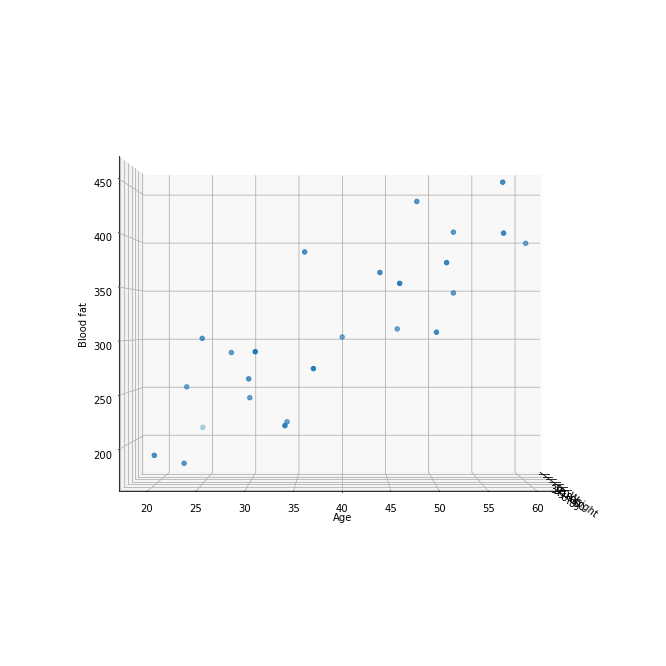

In [69]:
# 그래프 그리기
fig = plt.figure(figsize = (12, 12))

# 전체 공간을 1*1로 잡은 중 첫번째, 3d로 표시, 전체 공간을 나누는 개념
ax = fig.add_subplot(111, projection = '3d')

# 산점도 플롯을 만듦
ax.scatter(x1, x2, y_data)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
#ax.view_init(15, 15)      # 표고와 방위각 지정(3D 그래프의 보이는 방향)
ax.view_init(0, 0)

plt.show()

# ✨ 로지스틱 회귀 ✨
🐶 다중 선형 회귀와 달리 y값이 참과 거짓 두 분류로 나뉜다.    

🐱 s자 형태로 그려지는 sigmoid 함수 이용!             
🐷 y = 1 / (1 + exp(ax+b))  

🦊 a : 경사도를 결정(a값이 커질수록 오차는 작아진다.)          
🦊 b : 그래프의 위치 결정   

🐰 오차 함수 : 평균 제곱 오차를 비용 함수로 사용하면, 경사하강법을 사용하였을 때     
   => 글로벌 미니엄이 아닌 로컬 미니엄(잘못된 최소값)이 찾아지는 현상이 발생할 수 있다.

🤓 오차 함수로 평균 제곱 오차가 아닌 ⭐로그 함수⭐를 사용하자!

In [70]:
import tensorflow as tf
import numpy as np

In [85]:
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

a = tf.Variable(tf.random_normal([1], dtype = tf.float64, seed = 0))  # 정규분포로부터 난수값을 봔환
b = tf.Variable(tf.random_normal([1], dtype = tf.float64, seed = 0))

# 시그모이드 함수의 방정식을 세운다.
y = 1 / (1 + np.e**(a * x_data + b))

# loss를 구하는 함수
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 - np.array(y_data)) * tf.log(1 - y))

# 학습률 값
learning_rate = 0.5

# loss를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(90001):
        sess.run(gradient_decent)
        if i % 6000 == 0:
            print("Epoch : %.f, loss = %.4f, 기울기 a = %.4f, y 절편 b = %.4f" 
                 % (i, sess.run(loss), sess.run(a), sess.run(b)))
            
            ## 🙉 60000번 이상 돌렸을 때, 결과가 nan값이 나온 이유 : 더 이상 loss의 최소값을 찾을 수 없어서!!

Epoch : 0, loss = 1.2676, 기울기 a = 0.1849, y 절편 b = -0.4334
Epoch : 6000, loss = 0.0152, 기울기 a = -2.9211, y 절편 b = 20.2983
Epoch : 12000, loss = 0.0081, 기울기 a = -3.5638, y 절편 b = 24.8011
Epoch : 18000, loss = 0.0055, 기울기 a = -3.9557, y 절편 b = 27.5464
Epoch : 24000, loss = 0.0041, 기울기 a = -4.2380, y 절편 b = 29.5232
Epoch : 30000, loss = 0.0033, 기울기 a = -4.4586, y 절편 b = 31.0676
Epoch : 36000, loss = 0.0028, 기울기 a = -4.6396, y 절편 b = 32.3346
Epoch : 42000, loss = 0.0024, 기울기 a = -4.7930, y 절편 b = 33.4087
Epoch : 48000, loss = 0.0021, 기울기 a = -4.9261, y 절편 b = 34.3406
Epoch : 54000, loss = 0.0019, 기울기 a = -5.0436, y 절편 b = 35.1636
Epoch : 60000, loss = 0.0017, 기울기 a = -5.1489, y 절편 b = 35.9005
Epoch : 66000, loss = nan, 기울기 a = nan, y 절편 b = nan
Epoch : 72000, loss = nan, 기울기 a = nan, y 절편 b = nan
Epoch : 78000, loss = nan, 기울기 a = nan, y 절편 b = nan
Epoch : 84000, loss = nan, 기울기 a = nan, y 절편 b = nan
Epoch : 90000, loss = nan, 기울기 a = nan, y 절편 b = nan


In [87]:
y1 = 1 / (1 + np.e**(-5.1489 * 5 + 35.9005))   # 예측값 : 0 (불합격)
print(y1)
y2 = 1 / (1 + np.e**(-5.1489 * 7 + 35.9005))   # 예측값 : 0.5
print(y2)
y3 = 1 / (1 + np.e**(-5.1489 * 13 + 35.9005))   # 예측값 : 1 (합격)
print(y3)

3.884081848271441e-05
0.5353907190565972
0.9999999999999667


In [88]:
# constant 

x = tf.constant([[1.0, 2.0, 3.0]])
w = tf.constant([[2.0], [2.0], [2.0]])
y = tf.matmul(x, w)
print(x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)

print(result)

(1, 3)
[[12.]]


In [90]:
# Variable

x = tf.Variable([[1., 2., 3.]], dtype = tf.float32)
w = tf.Variable([[2.], [2.], [2.]], dtype = tf.float32)
y = tf.matmul(x, w)
print(x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)

print(result)

(1, 3)
[[12.]]


In [91]:
input_data = [[1.,2.,3.], [1.,2.,3.], [2.,3.,4.]]  # 3X3 matrix
x = tf.placeholder(dtype = tf.float32, shape = [None, 3])
w = tf.Variable([[2.], [2.], [2.]], dtype = tf.float32)  # 3X1 matrix
y = tf.matmul(x, w)

sess = tf. Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y, feed_dict={x:input_data})

print(result)

[[12.]
 [12.]
 [18.]]


In [92]:
# 😭브로드 캐스팅😭
# 행렬 계산을 진행할 때, 차원이 맞지 않는 경우 => 차원을 맞춰주기위해 행이나 열을 늘려준다!!
# 브로드 캐스팅은 늘려주는 것만 가능!! 줄이는 것은 불가능!!

input_data = [[1, 1, 1], [2, 2, 2]]
x = tf.placeholder(dtype = tf.float32, shape = [2, 3])   # 2X3
w = tf.Variable([[2], [2], [2]], dtype = tf.float32)   # 3X1
b = tf.Variable([4], dtype = tf.float32)   # 1X1
y = tf.matmul(x, w) + b   # 2X1 + 1X1 => 차원이 맞지 않음! => 브로드 캐스팅 덕분에 연산 가능!!
                         # => [[6], [12]] + [[4], [4]] = [[10], [16]]
print(x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y, feed_dict = {x:input_data})

print(result)

(2, 3)
[[10.]
 [16.]]


# ✨ 다중 로지스틱 회귀 ✨

In [3]:
import tensorflow as tf
import numpy as np

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

x_data = np.array([[2, 3], [4, 3], [6, 4], [8, 6], [10, 7], [12, 8], [14, 9]])   # 7X2
y_data = np.array([0, 0, 0, 1, 1, 1, 1]).reshape(7, 1)   # 7X1

X = tf.placeholder(tf.float64, shape = [None, 2])
Y = tf.placeholder(tf.float64, shape = [None, 1])

# 기울기 a와 바이어스 b의 값을 임의로 정함
a = tf.Variable(tf.random_uniform([2, 1], dtype = tf.float64))
# [2, 1] 의미 : 들어오는 값은 2개, 나가는 값은 1개

b = tf.Variable(tf.random_uniform([1], dtype = tf.float64))

# y 시그모이드 함수의 방정식을 세움
y = tf.sigmoid(tf.matmul(X, a) + b)

# 오차를 구하는 함수
loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y))

# 학습률 값
learning_rate = 0.1

# 오차를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


# 💥🚫⛔우리가 만든 모델의 정밀도를 측정하기 위해!💥🚫⛔
predicted = tf.cast(y > 0.5, dtype = tf.float64)   ## 0.5 를 기준으로 0, 1을 반환해준다.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float64))  ## predicted 와 Y가 같은지, 다른지
# => reduce_mean : 배열의 평균 (predicted(예측값)와 Y(실제값)를 비교했을 때 결과의 평균)


# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(3001):
        a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], feed_dict={X:x_data, Y:y_data})
        
        if (i + 1) % 300 == 0:
            print("step = %d, a1 = %.4f, a2 = %.4f, b = %.4f, loss = %.4f" 
                 % (i + 1, a_[0], a_[1], b_, loss_))
            
    
    # 추가 코드
    print("predicted = ", sess.run(predicted, feed_dict={X:x_data}))   # => y를 구하려면 X를 지정해줘야한다.

    # 다른 값 테스트
    p_val, h_val = sess.run([predicted, y], feed_dict = {X:[[1, 5], [10, 5], [4, 5]]})
    print("check predicted =", p_val)   # 연산된 값을 bool로 변환한 값
    print("check hypothesis =", h_val)  # 계산값
    
    # 정확도 측정
    h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis :", h, "\nCorrect (Y) :", c, "\nAccuracy :", a)

step = 300, a1 = 0.8851, a2 = -0.6773, b = -2.2926, loss = 0.2757
step = 600, a1 = 0.8667, a2 = -0.3759, b = -3.7848, loss = 0.1972
step = 900, a1 = 0.7672, a2 = -0.0318, b = -4.8670, loss = 0.1536
step = 1200, a1 = 0.6570, a2 = 0.2864, b = -5.7222, loss = 0.1253
step = 1500, a1 = 0.5532, a2 = 0.5683, b = -6.4306, loss = 0.1055
step = 1800, a1 = 0.4600, a2 = 0.8160, b = -7.0354, loss = 0.0910
step = 2100, a1 = 0.3777, a2 = 1.0339, b = -7.5634, loss = 0.0799
step = 2400, a1 = 0.3052, a2 = 1.2268, b = -8.0318, loss = 0.0711
step = 2700, a1 = 0.2411, a2 = 1.3987, b = -8.4530, loss = 0.0641
step = 3000, a1 = 0.1843, a2 = 1.5531, b = -8.8355, loss = 0.0583
predicted =  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted = [[0.]
 [1.]
 [0.]]
check hypothesis = [[0.29220556]
 [0.68409431]
 [0.41769405]]

Hypothesis : [[0.02171748]
 [0.03108711]
 [0.17982782]
 [0.87630764]
 [0.97976277]
 [0.99698656]
 [0.99955789]] 
Correct (Y) : [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy : 1.